## Load Model

In [49]:
from Models.CoherenceNets.MethodeB import MethodeB

In [ ]:
# First you need to download the weights on our page
ckpt = '2-Masks/checkpoint/model.ckpt'# Path of the model
model = MethodeB.load_from_checkpoint(ckpt, strict=False).eval()

In [51]:
model.hparams['v_distance'] # Model hparams register all parameters for the trained model

'l1'

## Load Flow Field

In [52]:
from csvflowdatamodule.CsvDataset import FilesLoaders

In [53]:
flow_path='images/00000.flo' # Example flow provided in the repo
flow = FilesLoaders().load_file(path=flow_path, type='Flow', img_size=model.hparams['img_size'])

## Compute Prediction

In [83]:
with torch.no_grad() :
    r = model.prediction({'Flow' :flow[None]})

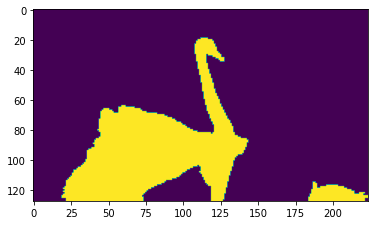

In [105]:
plt.imshow((r['Pred'].argmax(1)[0]))